# Fatal Police Shootings

### From January 2015 to June 2020

##### This data can be downloaded [here](https://www.kaggle.com/mrmorj/data-police-shootings)

###### Description of the data: 

The FBI and the Centers for Disease Control and Prevention log fatal shootings by police, but officials acknowledge that their data is incomplete. In 2015, The Post documented more than two times more fatal shootings by police than had been recorded by the FBI. Last year, the FBI announced plans to overhaul how it tracks fatal police encounters.

## Table of Contents:

* **[Description of the Data](##Welcome)**
    * [Data ](##)
    
    
* **[Importing Python Packages](#Imports)**


* **[Reading in the Data](##)**
    * [First Look](##)

* **[Data Exploration](##)**

* **[Feature Engineering](##)**
    * [Converting data values from strings to numeric](##)


* **[Using Machine Learning to understand major factors](##)**
    * [Standard Scaler](##)
    * [Principal Component Analysis (PCA)](##)
    
* **[Insights & Findings](##)**

* **[Conclusion](##)**

### Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# For building wordclouds
from wordcloud import WordCloud, STOPWORDS

# Training and Testing Splits
from sklearn.model_selection import train_test_split

# Scaling imports if need be
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

# Modeling imports 
from sklearn.linear_model import LogisticRegression 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.decomposition import PCA 
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import MultinomialNB 
from sklearn.ensemble import AdaBoostClassifier
from sklearn.svm import LinearSVC

# Model Evaluation Imports
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

#### Reading in the data

In [2]:
# Reading in the data
shootings = pd.read_csv('dataset.csv', index_col = None)

# Let's pull out the top 10 rows
shootings.head(10)

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,2015-01-02,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,2015-01-02,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False
2,5,John Paul Quintero,2015-01-03,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False
3,8,Matthew Hoffman,2015-01-04,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False
4,9,Michael Rodriguez,2015-01-04,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False
5,11,Kenneth Joe Brown,2015-01-04,shot,gun,18.0,M,W,Guthrie,OK,False,attack,Not fleeing,False
6,13,Kenneth Arnold Buck,2015-01-05,shot,gun,22.0,M,H,Chandler,AZ,False,attack,Car,False
7,15,Brock Nichols,2015-01-06,shot,gun,35.0,M,W,Assaria,KS,False,attack,Not fleeing,False
8,16,Autumn Steele,2015-01-06,shot,unarmed,34.0,F,W,Burlington,IA,False,other,Not fleeing,True
9,17,Leslie Sapp III,2015-01-06,shot,toy weapon,47.0,M,B,Knoxville,PA,False,attack,Not fleeing,False


In [3]:
# The last 10 rows
shootings.tail(10)

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
5406,5914,Mason James Lira,2020-06-11,shot,gun,26.0,M,W,Paso Robles,CA,True,attack,Foot,False
5407,5915,Michael Thomas,2020-06-11,shot,undetermined,62.0,M,B,Lancaster,CA,False,undetermined,Not fleeing,False
5408,5916,Rayshard Brooks,2020-06-12,shot,Taser,27.0,M,B,Atlanta,GA,False,attack,Foot,True
5409,5925,Caine Van Pelt,2020-06-12,shot,gun,23.0,M,B,Crown Point,IN,False,attack,Car,False
5410,5918,Hannah Fizer,2020-06-13,shot,unarmed,25.0,F,W,Sedalia,MO,False,other,Not fleeing,False
5411,5921,William Slyter,2020-06-13,shot,gun,22.0,M,W,Kansas City,MO,False,other,Other,False
5412,5922,TK TK,2020-06-13,shot,undetermined,NaN,M,NaN,San Bernardino,CA,False,attack,Not fleeing,False
5413,5924,Nicholas Hirsh,2020-06-15,shot,gun,31.0,M,W,Lawrence,KS,False,attack,Car,False
5414,5926,TK TK,2020-06-16,shot,gun,24.0,M,NaN,Beach Park,IL,False,attack,Not fleeing,False
5415,5927,TK TK,2020-06-16,shot,gun,27.0,M,NaN,Phoenix,AZ,False,attack,Not fleeing,False


Before moving onto the Exploratory Data Analysis, or EDA, I'm going to take a second here and reset the index just in case as I don't want to reset the id column considering this maybe helpful later on. 

In [4]:
shootings.reset_index(inplace = True, drop = True)
shootings.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,2015-01-02,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,2015-01-02,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False
2,5,John Paul Quintero,2015-01-03,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False
3,8,Matthew Hoffman,2015-01-04,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False
4,9,Michael Rodriguez,2015-01-04,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False


### Exploratory Data Analysis

In [5]:
# First step is to check what the data you're working with is
shootings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5416 entries, 0 to 5415
Data columns (total 14 columns):
id                         5416 non-null int64
name                       5416 non-null object
date                       5416 non-null object
manner_of_death            5416 non-null object
armed                      5189 non-null object
age                        5181 non-null float64
gender                     5414 non-null object
race                       4895 non-null object
city                       5416 non-null object
state                      5416 non-null object
signs_of_mental_illness    5416 non-null bool
threat_level               5416 non-null object
flee                       5167 non-null object
body_camera                5416 non-null bool
dtypes: bool(2), float64(1), int64(1), object(10)
memory usage: 518.5+ KB


It does seem like we've got some null values so will have to look into that!

**Checking for data types**

In [5]:
# Checking for datatypes
shootings.dtypes

id                           int64
name                        object
date                        object
manner_of_death             object
armed                       object
age                        float64
gender                      object
race                        object
city                        object
state                       object
signs_of_mental_illness       bool
threat_level                object
flee                        object
body_camera                   bool
dtype: object

Taking a look at the data types, we can see that some might have to be changed such as for instance, the date column has been read in as a string but needs to be converted to date time. Similarly, the age has been read in as float so we must converted that to integer values. The gender column is read in as a string but will need to be converted to a boolean type given it has only Males and Females. 

**Looking at the total number of data points we have**

In [6]:
# Checking for total counts 
shootings['id'].value_counts()

2047    1
673     1
661     1
4759    1
2712    1
       ..
1338    1
3387    1
5436    1
1342    1
2049    1
Name: id, Length: 5416, dtype: int64

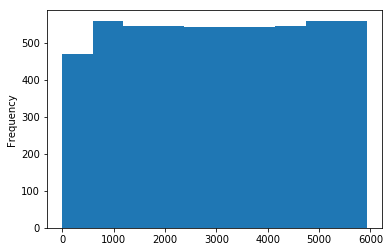

In [7]:
# To check the distribution of the id 
shootings['id'].plot.hist()

The first thing we've noticed here is that the id column seems to be unrelated as the numbers aren't in order. Secondly, we've tried to understand if this would relate somehow but will keep this column for now.

**Let's take a look at the number of null values**

In [8]:
# Checking for nulls
shootings.isnull().sum()

id                           0
name                         0
date                         0
manner_of_death              0
armed                      227
age                        235
gender                       2
race                       521
city                         0
state                        0
signs_of_mental_illness      0
threat_level                 0
flee                       249
body_camera                  0
dtype: int64

In [9]:
# Printing out null value propotions
print(f"Armed null value proportions being dropped: {shootings['armed'].isna().sum()/len(shootings['armed'])}")
print()
print(f"Age null value proportions being dropped: {shootings['age'].isna().sum()/len(shootings['age'])}")
print()
print(f"Race null value proportions being dropped: {shootings['race'].isna().sum()/len(shootings['race'])}")
print()
print(f"Flee null value proportions being dropped: {shootings['flee'].isna().sum()/len(shootings['flee'])}")

Armed null value proportions being dropped: 0.041912850812407684

Age null value proportions being dropped: 0.04338995568685377

Race null value proportions being dropped: 0.09619645494830133

Flee null value proportions being dropped: 0.04597488921713442


From the data we have, we're keeping a threshold of 0.05% and dropping the data points with null values. The other thing to note here is that **race** has almost 10% null values and we don't want to cause any biases so we will rather drop these rows than fill it in. Hence, making an exception and dropping the race columns too altogether. 

In [10]:
# Let's drop these null values from above
shootings.dropna(axis = 0, inplace = True)

**Now let's look at the duplicated values**

In [11]:
# Checking for duplicates
print(shootings.duplicated().sum())

# Even though there are no duplicates, we're going to run the code so that if there might be any, this will drop
shootings.drop_duplicates()

0


,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,2015-01-02,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,2015-01-02,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False
2,5,John Paul Quintero,2015-01-03,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False
3,8,Matthew Hoffman,2015-01-04,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False
4,9,Michael Rodriguez,2015-01-04,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5408,5916,Rayshard Brooks,2020-06-12,shot,Taser,27.0,M,B,Atlanta,GA,False,attack,Foot,True
5409,5925,Caine Van Pelt,2020-06-12,shot,gun,23.0,M,B,Crown Point,IN,False,attack,Car,False
5410,5918,Hannah Fizer,2020-06-13,shot,unarmed,25.0,F,W,Sedalia,MO,False,other,Not fleeing,False
5411,5921,William Slyter,2020-06-13,shot,gun,22.0,M,W,Kansas City,MO,False,other,Other,False


**While we're exploring the data, I want to split the first, middle, and last name of the individual into three different columns. Let's do this below.**

In [12]:
# First, we create a pandas series as splitted which will hold our splitted words
splitted = shootings['name'].str.split()

# Getting the first names out from the name column 
shootings['First Name'] = splitted.str[0] # Getting the first string from the list 

# Getting the middle names out from the name column
# Getting the second string from the list where length of name is 3
shootings['Middle Name'] = shootings['name'].loc[shootings['name'].str.split().str.len() == 3].str.split(expand = True)[1] 


# Getting the last name out from the name column
shootings['Last Name'] = splitted.str[-1] # Getting the last string from the list through slicing

# Source for help:
# https://stackoverflow.com/questions/44406207/i-am-trying-to-split-a-full-name-to-first-middle-and-last-name-in-pandas-but-i-a

In [13]:
# Printing out the number of missing values in names
print(f"Missing first names: {shootings['First Name'].isna().sum()}")
print(f"Missing middle names: {shootings['Middle Name'].isna().sum()}")
print(f"Missing last names: {shootings['Last Name'].isna().sum()}")

Missing first names: 0
Missing middle names: 2815
Missing last names: 0


Here we're not going to drop these 2815 rows where middle names are missing but rather fill it in with a **-**

In [14]:
# Filling in all empty middle names with -'s
shootings['Middle Name'].fillna('-', inplace = True)

In [15]:
# Setting up variables and series for wordclouds below
first_name = shootings['First Name']
middle_name = shootings['Middle Name']
last_name = shootings['Last Name']

In [16]:
# While we're at it, let's see the top names of individuals who were involved in a fatal shooting
# Setting up the word clouds for first names
firstnames = WordCloud(width = 500, height = 500, background_color = 'white').generate(str(first_name))

# Setting up the word cloud for middle names
middlenames = WordCloud(width = 500, height = 500, background_color = 'white').generate(str(middle_name))

# Setting up the word cloud for last name
lastnames = WordCloud(width = 500, height = 500, background_color = 'white').generate(str(last_name))


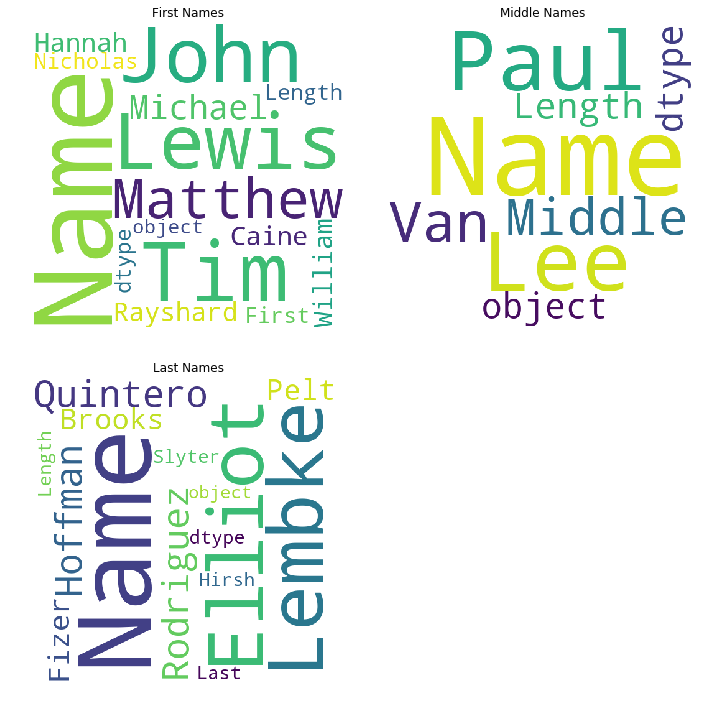

In [17]:
# Now that we've intialized the word clouds, let's pull these out
# Plotting 3 subplots to identify the top first names, middle names, and last names
plt.subplots(1,3, figsize = (10,10))

plt.subplot(2,2,1)
plt.imshow(firstnames)
plt.title('First Names')
plt.axis('off')

plt.subplot(2,2,2)
plt.imshow(middlenames)
plt.title('Middle Names')
plt.axis('off')

plt.subplot(2,2,3)
plt.imshow(lastnames)
plt.title('Last Names')
plt.axis('off')

plt.tight_layout()
plt.show()

We see that the word **Name, First, Last, and middle**, also show up so we're going to remove these words. But it would be a good idea to check for the number of rows where first name, last name, and middle names are filled with these words.  

**Before we move on to doing much, let's also split the date column into different date time aspects to understand how the timing dynamics look like for our dataset**

In [11]:
# Splitting up the date time column
shootings['date'] = pd.to_datetime(shootings['date'])
shootings['date']

# Extracting the year
shootings['Year'] = shootings['date'].dt.year

# Extracting the month
shootings['Month'] = shootings['date'].dt.month_name()

# Extracting the day of month
shootings['Day'] = shootings['date'].dt.day

# Extracting the day of month
shootings['Day of Week'] = shootings['date'].dt.day_name()

# Taking a look at the data
shootings.head(2)

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,Year,Month,Day,Day of Week
0,3,Tim Elliot,2015-01-02,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False,2015,January,2,Friday
1,4,Lewis Lee Lembke,2015-01-02,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False,2015,January,2,Friday


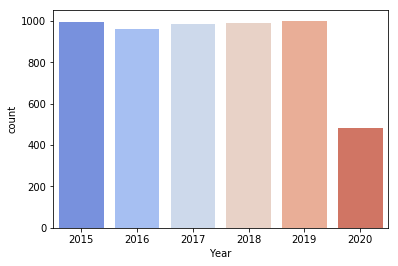

In [15]:
# Visually seeing the distribution of the killings
plt.figure()
sns.countplot(shootings['Year'], palette = 'coolwarm')
plt.show()

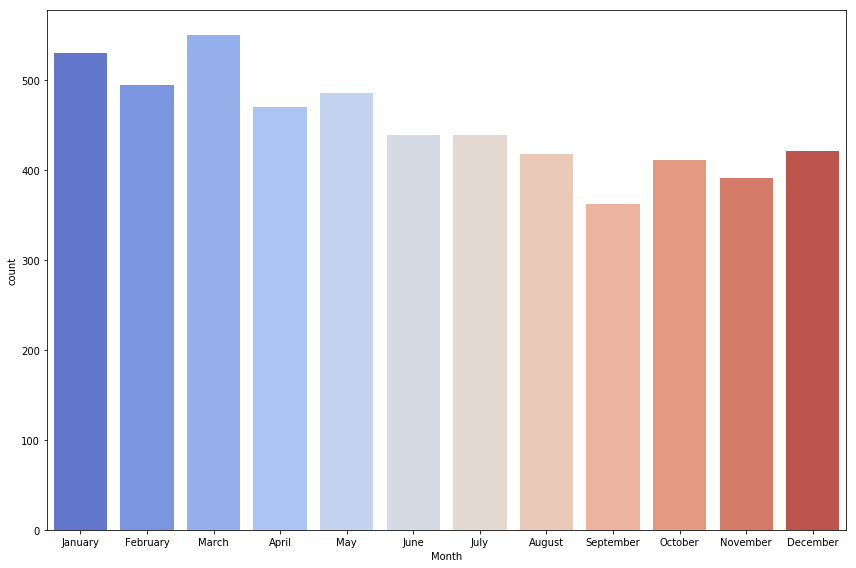

In [19]:
# Visually seeing the distribution of the killings
plt.figure(figsize = (12,8))
sns.countplot(shootings['Month'], palette = 'coolwarm')
plt.tight_layout()
plt.show()

In [18]:
# Checking for how many were armed 
shootings['armed'].value_counts()

gun                2596
knife               660
unarmed             336
toy weapon          165
vehicle             117
                   ... 
spear                 1
metal hand tool       1
chain saw             1
walking stick         1
machete and gun       1
Name: armed, Length: 90, dtype: int64

In [22]:
# Checking the value counts
shootings['gender'].value_counts()

M    4202
F     197
Name: gender, dtype: int64

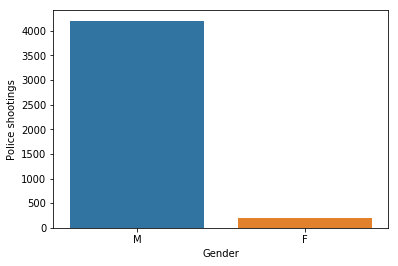

In [23]:
# Seeing the distribtution for genders 
plt.figure()
sns.countplot(shootings['gender'])
plt.xlabel('Gender')
plt.ylabel('Police shootings')
plt.show()

We can see there are a lot of males in our sample. 

**Let's convert our date column from object to date time and extract the months, years and daily shootings.**

In [24]:
# Converting date column from object to datetime
shootings['date'] = pd.to_datetime(shootings['date'])

In [25]:
# Extracting the time of event
# Extracting the day of month
shootings['Day'] = shootings['date'].dt.day

# Extracting the day of the week
shootings['Day of the week'] = shootings['date'].dt.day_name()

# Extracting the month
shootings['Month'] = shootings['date'].dt.month_name()

# Extracting the year
shootings['Year'] = shootings['date'].dt.year

# Looking at the dataframe
shootings.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,...,threat_level,flee,body_camera,First Name,Middle Name,Last Name,Day,Day of the week,Month,Year
0,3,Tim Elliot,2015-01-02,shot,gun,53.0,M,A,Shelton,WA,...,attack,Not fleeing,False,Tim,0,Elliot,2,Friday,January,2015
1,4,Lewis Lee Lembke,2015-01-02,shot,gun,47.0,M,W,Aloha,OR,...,attack,Not fleeing,False,Lewis,Lee,Lembke,2,Friday,January,2015
2,5,John Paul Quintero,2015-01-03,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,...,other,Not fleeing,False,John,Paul,Quintero,3,Saturday,January,2015
3,8,Matthew Hoffman,2015-01-04,shot,toy weapon,32.0,M,W,San Francisco,CA,...,attack,Not fleeing,False,Matthew,0,Hoffman,4,Sunday,January,2015
4,9,Michael Rodriguez,2015-01-04,shot,nail gun,39.0,M,H,Evans,CO,...,attack,Not fleeing,False,Michael,0,Rodriguez,4,Sunday,January,2015


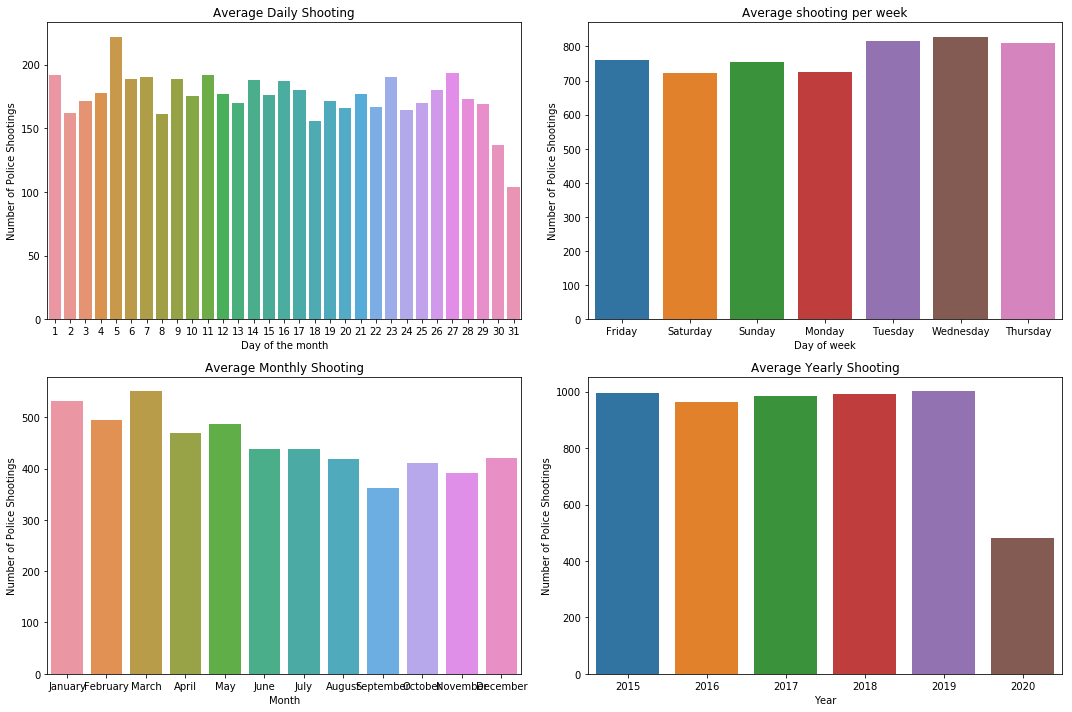

In [24]:
# Looking at the distribution of the shooting times
plt.subplots(2,2, figsize = (15,10))

# Subplot for day 
plt.subplot(2,2,1)
sns.countplot(shootings['Day'])
plt.title('Average Daily Shooting')
plt.xlabel('Day of the month')
plt.ylabel('Number of Police Shootings')

# Subplot for day of the week
plt.subplot(2,2,2)
sns.countplot(shootings['Day of Week'])
plt.title('Average shooting per week')
plt.xlabel('Day of week')
plt.ylabel('Number of Police Shootings')

# Subplot for month
plt.subplot(2,2,3)
sns.countplot(shootings['Month'])
plt.title('Average Monthly Shooting')
plt.xlabel('Month')
plt.ylabel('Number of Police Shootings')

# Subplot for year
plt.subplot(2,2,4)
sns.countplot(shootings['Year'])
plt.title('Average Yearly Shooting')
plt.xlabel('Year')
plt.ylabel('Number of Police Shootings')

plt.tight_layout()
plt.show()

**Let's also convert the age data type here, from float to integers**

In [19]:
# Converting age from float to int datatype
shootings['age'] = shootings['age'].astype(int)

In [20]:
shootings.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,First Name,Middle Name,Last Name
0,3,Tim Elliot,2015-01-02,shot,gun,53,M,A,Shelton,WA,True,attack,Not fleeing,False,Tim,-,Elliot
1,4,Lewis Lee Lembke,2015-01-02,shot,gun,47,M,W,Aloha,OR,False,attack,Not fleeing,False,Lewis,Lee,Lembke
2,5,John Paul Quintero,2015-01-03,shot and Tasered,unarmed,23,M,H,Wichita,KS,False,other,Not fleeing,False,John,Paul,Quintero
3,8,Matthew Hoffman,2015-01-04,shot,toy weapon,32,M,W,San Francisco,CA,True,attack,Not fleeing,False,Matthew,-,Hoffman
4,9,Michael Rodriguez,2015-01-04,shot,nail gun,39,M,H,Evans,CO,False,attack,Not fleeing,False,Michael,-,Rodriguez


In [21]:
# Checking for value counts for manner of death
shootings['manner_of_death'].value_counts()

shot                4169
shot and Tasered     230
Name: manner_of_death, dtype: int64

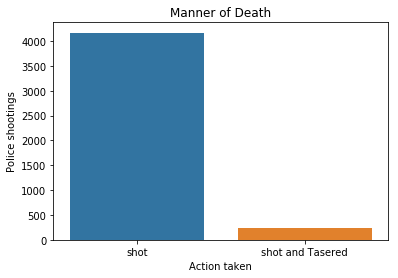

In [22]:
# Checking distribution of manner_of_death
plt.figure()
sns.countplot(shootings['manner_of_death'])
plt.title('Manner of Death')
plt.xlabel('Action taken')
plt.ylabel('Police shootings')
plt.show()

Mean Age of Victim: 36.63287110706979


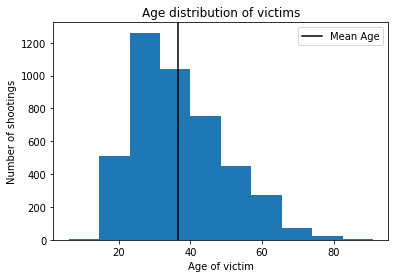

In [23]:
# Printing mean age of victim
print(f"Mean Age of Victim: {shootings['age'].mean()}")

# Age distribution of killings 
plt.figure()
plt.hist(shootings['age'], bins = 10)
plt.xlabel('Age of victim')
plt.ylabel('Number of shootings')
plt.title('Age distribution of victims')
plt.axvline(x = shootings['age'].mean(), color = 'black', label = 'Mean Age')
plt.legend()
plt.show()

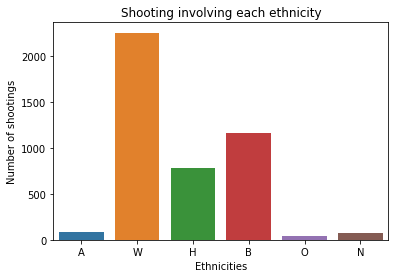

In [24]:
# Checking for race distribution
plt.figure()
sns.countplot(shootings['race'])
plt.title('Shooting involving each ethnicity')
plt.xlabel('Ethnicities')
plt.ylabel('Number of shootings')
plt.show()

In [25]:
# Checking for state uniqueness
shootings['state'].nunique()

51

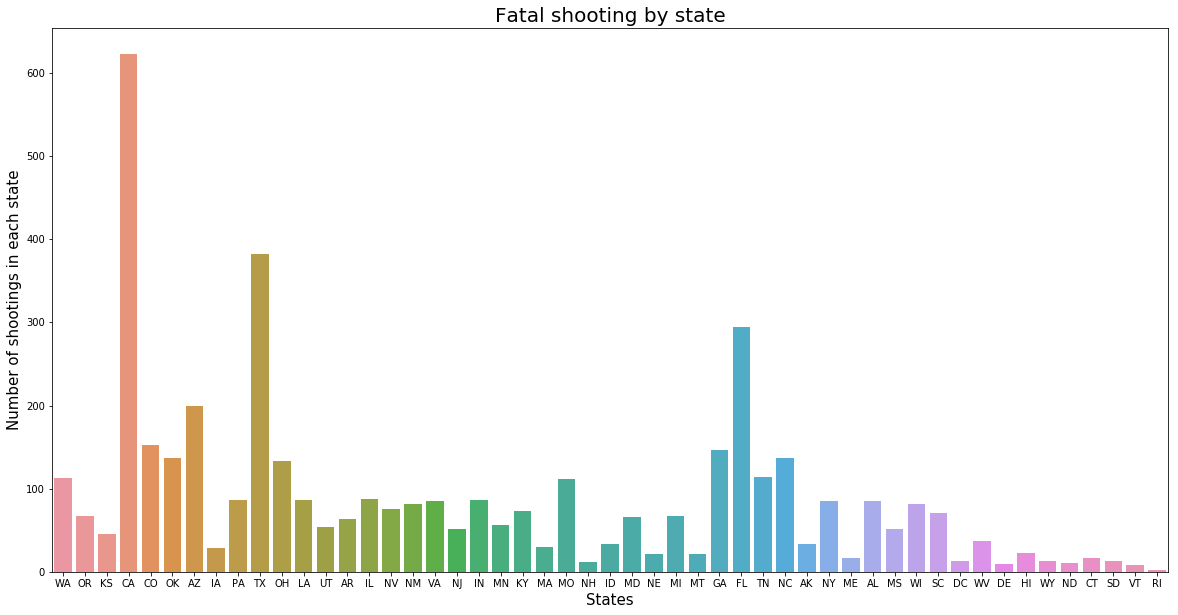

In [217]:
# Checking the distributions for states 
plt.figure(figsize = (20,10))
sns.countplot(shootings['state'])
plt.title('Fatal shooting by state', fontsize = 20)
plt.xlabel('States', fontsize = 15)
plt.ylabel('Number of shootings in each state', fontsize = 15)
plt.show()

In [27]:
# Checking for city uniqueness
shootings['city'].nunique()

2116

In [28]:
# Checking for value counts
shootings['signs_of_mental_illness'].value_counts()

False    3361
True     1038
Name: signs_of_mental_illness, dtype: int64

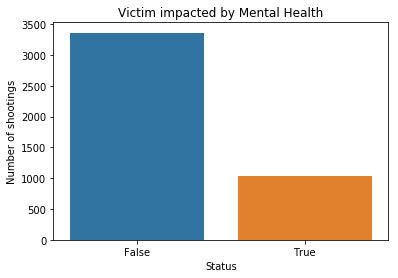

In [29]:
# Plotting value counts for mental illness for people being shot
plt.figure()
sns.countplot(shootings['signs_of_mental_illness'])
plt.title('Victim impacted by Mental Health')
plt.xlabel('Status')
plt.ylabel('Number of shootings')
plt.show()

In [30]:
# Checking for threat level distribution
shootings['threat_level'].value_counts()

attack          2911
other           1322
undetermined     166
Name: threat_level, dtype: int64

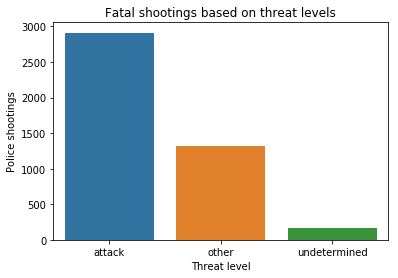

In [31]:
# Plotting out the threat level distribution
plt.figure()
sns.countplot(shootings['threat_level'])
plt.xlabel('Threat level')
plt.ylabel('Police shootings')
plt.title('Fatal shootings based on threat levels')
plt.show()

In [32]:
# Checking the distribution of fleeing 
shootings['flee'].value_counts()

Not fleeing    2965
Car             657
Foot            630
Other           147
Name: flee, dtype: int64

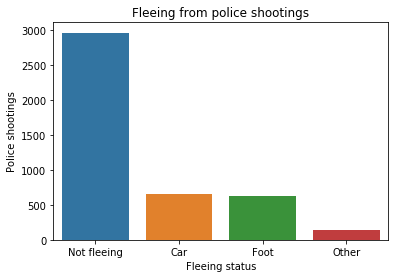

In [33]:
# Plotting out the threat level distribution
plt.figure()
sns.countplot(shootings['flee'])
plt.xlabel('Fleeing status')
plt.ylabel('Police shootings')
plt.title('Fleeing from police shootings')
plt.show()

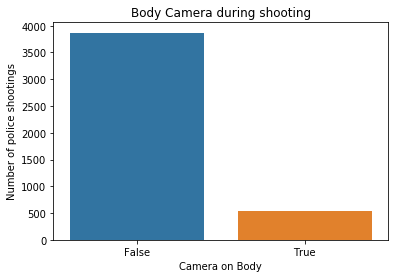

In [34]:
# Plotting to see the distribution of body cameras when shooting occured
plt.figure()
sns.countplot(shootings['body_camera'])
plt.xlabel('Camera on Body')
plt.ylabel('Number of police shootings')
plt.title('Body Camera during shooting')
plt.show()

We would not be wrong to assume that most times when the shooting took place, the officer was not wearing a body camera - this may be done in order to not record the incident. 

### Let's now take a deeper look and do further analyzing

In [41]:
shootings.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,First Name,Middle Name,Last Name
0,3,Tim Elliot,2015-01-02,shot,gun,53,M,A,Shelton,WA,True,attack,Not fleeing,False,Tim,-,Elliot
1,4,Lewis Lee Lembke,2015-01-02,shot,gun,47,M,W,Aloha,OR,False,attack,Not fleeing,False,Lewis,Lee,Lembke
2,5,John Paul Quintero,2015-01-03,shot and Tasered,unarmed,23,M,H,Wichita,KS,False,other,Not fleeing,False,John,Paul,Quintero
3,8,Matthew Hoffman,2015-01-04,shot,toy weapon,32,M,W,San Francisco,CA,True,attack,Not fleeing,False,Matthew,-,Hoffman
4,9,Michael Rodriguez,2015-01-04,shot,nail gun,39,M,H,Evans,CO,False,attack,Not fleeing,False,Michael,-,Rodriguez


In [103]:
# What are the names of the individuals who got shot while the officer did not have a body_camera on?
shootings[shootings[shootings['manner_of_death'] == 'shot'] and [shootings[shootings['armed'] == 'unarmed']] and shootings[shootings['gender'] == 'M']]

ValueError: The truth value of a DataFrame is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

**We're going to keep a few questions in mind while doing the analysis. Some of the questions that we look at are as follows. How many individuals were:**

    1. How many individuals were not fleeing but were shot? 
    2. How many individuals were not fleeing but were tasered and shot? 
    3. How many individuals were not fleeing but were tasered and shot and were male?
    4. How many individuals were not fleeing but were tasered and shot and were female?
    5. How many individuals were armed and shot and were male?
    6. How many individuals were armed and shot and were female?
    7. How many individuals were unarmed and shot?
    8. How many individuals were unarmed and shot and were male?
    9. How many individuals were unarmed and shot and were female?
    10. How many individuals were armed, shot and tasered?
    11. How many individuals were armed, shot and tasered and were male?
    12. How many individuals were armed, shot and tasered and were female?
    13. How many individuals were unarmed, shot and tasered? 
    14. How many individuals were unarmed, shot and tasered and were male? 
    15. How many individuals were unarmed, shot and tasered and were female? 
    16. How many individuals showed signs of mental illnesses and were shot? 
    17. How many individuals showed `no` signs of mental illnesses and were shot? 
    18. How many individuals showed **no** signs of mental illnesses and were shot? 
    19. 
    20. 
    
    

**How many individuals were not fleeing but were shot**

In [228]:
shootings[shootings['flee'] == 'Not fleeing']

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,First Name,Middle Name,Last Name
0,3,Tim Elliot,2015-01-02,shot,gun,53,M,A,Shelton,WA,True,attack,Not fleeing,False,Tim,-,Elliot
1,4,Lewis Lee Lembke,2015-01-02,shot,gun,47,M,W,Aloha,OR,False,attack,Not fleeing,False,Lewis,Lee,Lembke
2,5,John Paul Quintero,2015-01-03,shot and Tasered,unarmed,23,M,H,Wichita,KS,False,other,Not fleeing,False,John,Paul,Quintero
3,8,Matthew Hoffman,2015-01-04,shot,toy weapon,32,M,W,San Francisco,CA,True,attack,Not fleeing,False,Matthew,-,Hoffman
4,9,Michael Rodriguez,2015-01-04,shot,nail gun,39,M,H,Evans,CO,False,attack,Not fleeing,False,Michael,-,Rodriguez
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5395,5903,Benjamin Ballard,2020-06-05,shot,gun,42,M,W,Mustang,OK,False,attack,Not fleeing,False,Benjamin,-,Ballard
5397,5900,Erik Salgado,2020-06-06,shot,undetermined,22,M,H,Oakland,CA,False,undetermined,Not fleeing,False,Erik,-,Salgado
5400,5908,Jarrid Hurst,2020-06-07,shot,knife,35,M,W,Industry,CA,True,other,Not fleeing,False,Jarrid,-,Hurst
5407,5915,Michael Thomas,2020-06-11,shot,undetermined,62,M,B,Lancaster,CA,False,undetermined,Not fleeing,False,Michael,-,Thomas


In [230]:
shootings[shootings['manner_of_death'] == 'shot']

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,First Name,Middle Name,Last Name
0,3,Tim Elliot,2015-01-02,shot,gun,53,M,A,Shelton,WA,True,attack,Not fleeing,False,Tim,-,Elliot
1,4,Lewis Lee Lembke,2015-01-02,shot,gun,47,M,W,Aloha,OR,False,attack,Not fleeing,False,Lewis,Lee,Lembke
3,8,Matthew Hoffman,2015-01-04,shot,toy weapon,32,M,W,San Francisco,CA,True,attack,Not fleeing,False,Matthew,-,Hoffman
4,9,Michael Rodriguez,2015-01-04,shot,nail gun,39,M,H,Evans,CO,False,attack,Not fleeing,False,Michael,-,Rodriguez
5,11,Kenneth Joe Brown,2015-01-04,shot,gun,18,M,W,Guthrie,OK,False,attack,Not fleeing,False,Kenneth,Joe,Brown
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5408,5916,Rayshard Brooks,2020-06-12,shot,Taser,27,M,B,Atlanta,GA,False,attack,Foot,True,Rayshard,-,Brooks
5409,5925,Caine Van Pelt,2020-06-12,shot,gun,23,M,B,Crown Point,IN,False,attack,Car,False,Caine,Van,Pelt
5410,5918,Hannah Fizer,2020-06-13,shot,unarmed,25,F,W,Sedalia,MO,False,other,Not fleeing,False,Hannah,-,Fizer
5411,5921,William Slyter,2020-06-13,shot,gun,22,M,W,Kansas City,MO,False,other,Other,False,William,-,Slyter


In [232]:
shootings[shootings['flee'] == 'Not fleeing' and shootings['manner_of_death'] == 'shot']]

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().